In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
variance = VarianceThreshold(threshold=0)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder
import os
os.getcwd()

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()
test.head()

In [ ]:
train.shape

In [ ]:
train.describe()

In [5]:
train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [6]:
test.describe()


,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [8]:
train_target = train['y']
train_features = train.drop(["ID","y"],axis=1)

In [9]:
train_features.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_features.var().sort_values

<bound method Series.sort_values of X10     0.013131
X11     0.000000
X12     0.069457
X13     0.054623
X14     0.244893
          ...   
X380    0.008015
X382    0.007547
X383    0.001661
X384    0.000475
X385    0.001424
Length: 368, dtype: float64>

In [11]:
train_features_without_zero_var = variance.fit_transform(train_features.iloc[:,9:])
train_features_without_zero_var

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
object_data = train_features.iloc[:,0:8]
object_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [13]:
object_data.nunique()

X0    47
X1    27
X2    44
X3     7
X4     4
X5    29
X6    12
X8    25
dtype: int64

In [14]:
object_data1 = object_data.apply(label().fit_transform)
object_data1

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


In [15]:
object_data1.var()

X0    188.741938
X1     72.777974
X2    118.808135
X3      3.027295
X4      0.005461
X5     68.076236
X6      8.508730
X8     49.531868
dtype: float64

In [16]:
train_features_zero_var_final = pd.DataFrame(train_features_without_zero_var)
train_features_zero_var_final.head()

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
0,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
final_train_data = pd.concat([object_data1,train_features_zero_var_final],axis=1)
final_train_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,0,1,...,345,346,347,348,349,350,351,352,353,354
0,32,23,17,0,3,24,9,14,0,1,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
final_train_data.isnull().any()

X0     False
X1     False
X2     False
X3     False
X4     False
       ...  
350    False
351    False
352    False
353    False
354    False
Length: 363, dtype: bool

In [19]:
test = test.drop(["ID"],axis=1)
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [20]:
train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [21]:
test.nunique()

X0      49
X1      27
X2      45
X3       7
X4       4
        ..
X380     2
X382     2
X383     2
X384     2
X385     2
Length: 376, dtype: int64

In [22]:
test.isnull().any()

X0      False
X1      False
X2      False
X3      False
X4      False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 376, dtype: bool

In [23]:
test.var().sort_values

<bound method Series.sort_values of X10     0.018650
X11     0.000238
X12     0.068851
X13     0.057345
X14     0.244859
          ...   
X380    0.008015
X382    0.008715
X383    0.000475
X384    0.000712
X385    0.001661
Length: 368, dtype: float64>

In [24]:
test_without_zero_var = variance.fit_transform(test.iloc[:,9:])
test_without_zero_var

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
test_without_zero_var_final = pd.DataFrame(test_without_zero_var)
test_without_zero_var_final.head()

,0,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
object_data1 = test.iloc[:,0:8]
object_data1.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m


In [27]:
test_object = object_data1.apply(label().fit_transform)
test_object.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12


In [28]:
final_test_data = pd.concat([test_object,test_without_zero_var_final],axis=1)
final_test_data.head(5)

,X0,X1,X2,X3,X4,X5,X6,X8,0,1,...,352,353,354,355,356,357,358,359,360,361
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


Perform Dimensionality Reduction

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_train_data, train_target, test_size=0.3, random_state=100)

In [30]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2946, 363), (1263, 363), (2946,), (1263,))

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=10)

In [33]:
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
final_test_data = pca.fit_transform(final_test_data)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


XGBoost

In [43]:
from sklearn import svm
import xgboost
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
xgbr = XGBRegressor(random_state=42)

In [44]:
model = xgbr.fit(x_train,y_train)

In [45]:
ypred_train = model.predict(x_train)
ypred_train

array([101.70102 , 110.58435 , 103.953835, ..., 107.49767 ,  93.568665,
        93.39722 ], dtype=float32)

In [47]:
ypred_test = model.predict(x_test)
ypred_test

array([ 99.607475, 105.53599 , 103.513954, ..., 107.61864 , 103.45347 ,
       108.345055], dtype=float32)

In [49]:
print(r2_score(ypred_train, y_train))

0.900343529352809


In [51]:
print(mean_squared_error(ypred_train, y_train))

11.513686393000198


In [53]:
test_data_final_prediction = model.predict(final_test_data)
test_data_final_prediction

array([ 86.84912 ,  95.35551 ,  92.045876, ..., 103.70117 , 105.51476 ,
        92.16628 ], dtype=float32)

In [55]:
prediction = pd.DataFrame({'ytest':y_test,'ypred':ypred_test})

<function matplotlib.pyplot.show(close=None, block=None)>

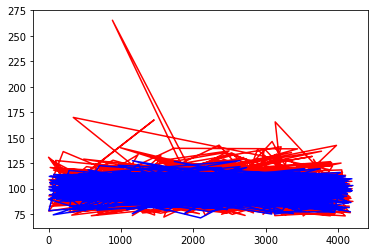

In [58]:
plt.plot(prediction['ytest'],color='red')
plt.plot(prediction['ypred'],color='blue')
plt.show